In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [35]:
"""Load dataset into data variable"""
data = pd.read_csv("ifood_df.csv")
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [7]:
"""Check missing values"""
missing_values = data.isnull().sum()
missing_values

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [12]:
"""Check duplicates"""
duplicates = data.duplicated()
data[duplicates]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall


In [11]:
"""Delete duplicates found"""
data.drop_duplicates(inplace = True)

In [15]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [17]:
"""Check datatype of each column"""
data.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [19]:
"""Descriptive analysis"""
desc_stats = round(data.describe(), 2)
desc_stats

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,2021.00,...,2021.00,2021.00,2021.00,2021.00,2021.0,2021.00,2021.00,2021.00,2021.00,2021.00
mean,51687.26,0.44,0.51,48.88,306.49,26.36,166.06,37.60,27.27,43.92,...,0.25,0.03,0.09,0.02,0.5,0.17,0.22,563.79,519.87,0.30
std,20713.05,0.54,0.55,28.95,337.60,39.78,219.87,54.89,41.58,51.68,...,0.43,0.18,0.29,0.15,0.5,0.37,0.41,576.78,554.80,0.68
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.00,-283.00,0.00
25%,35416.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,9.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,55.00,42.00,0.00
50%,51412.00,0.00,0.00,49.00,178.00,8.00,68.00,12.00,8.00,25.00,...,0.00,0.00,0.00,0.00,1.0,0.00,0.00,343.00,288.00,0.00
75%,68274.00,1.00,1.00,74.00,507.00,33.00,230.00,50.00,34.00,56.00,...,1.00,0.00,0.00,0.00,1.0,0.00,0.00,964.00,883.00,0.00
max,113734.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,321.00,...,1.00,1.00,1.00,1.00,1.0,1.00,1.00,2491.00,2458.00,4.00


In [20]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
x = data

In [23]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
"""Calculate wcss"""
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss_score = kmeans.inertia_
    wcss.append(wcss_score)

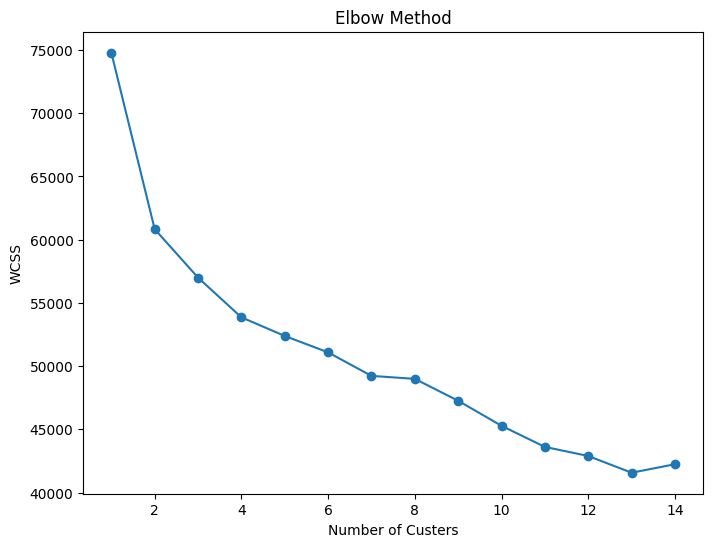

In [27]:
"""Plot elbow method"""
plt.figure(figsize = (8,6))
plt.plot(range(1,15), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Custers')
plt.ylabel('WCSS')
plt.show()


In [28]:
final_km = KMeans(n_clusters = 2)
final_km.fit(x_scaled)
labels = final_km.labels_
labels

array([0, 1, 0, ..., 0, 0, 1], shape=(2021,), dtype=int32)

In [29]:
"""Create new column clusters"""
data['Clusters'] = labels
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Clusters
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,1
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,1


In [32]:
x = data.drop('Clusters', axis = 1)
grouped = round(data.groupby('Clusters').mean(),2)
grouped

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
Clusters,,,,,,,,,,,,,,,,,,,,,
0,71532.22,0.06,0.43,49.17,621.10,55.85,361.91,79.58,58.01,74.80,...,0.24,0.05,0.08,0.00,0.53,0.15,0.24,1176.45,1101.65,0.60
1,38738.54,0.69,0.56,48.69,101.21,7.12,38.27,10.21,7.21,23.77,...,0.26,0.03,0.10,0.04,0.48,0.17,0.20,164.03,140.26,0.11


In [20]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [34]:
mapping = {0:'Spend more',1:'Spend Less'}
data['Customer Spending'] = data['Clusters'].map(mapping)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Clusters,Customer Spending
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,0,Spend more
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,1,Spend Less
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,0,Spend more
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,1,Spend Less
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,1,Spend Less
